# Communicate Data Finding Visualisation
## by (Amit Kumar Singh)


# Introduction
Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [3]:
df_clean = pd.read_csv('fordgo_master_clean.csv')

## what are the number of users to different station range? from which station most of the rides are booked.

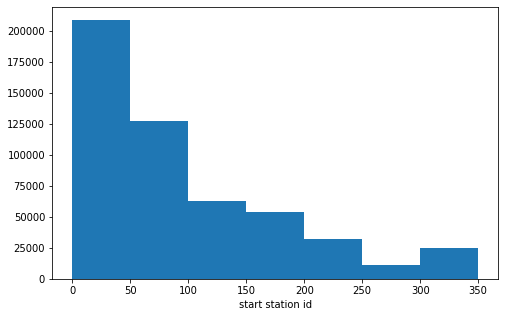

In [4]:
binsize = 50
bins = np.arange(0, df_clean['start_station_id'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'start_station_id', bins = bins)
plt.xlabel('start station id')
plt.show()

This is univariate plot between count of no of users between different station id. 
We can interprate from the graph that most of the users are from station ids range 0 to 50

## Which age category Members are booking more rides?

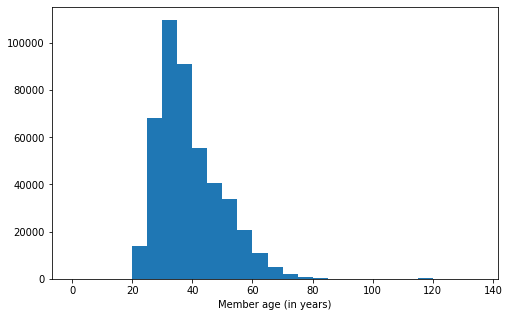

In [5]:
binsize = 5
bins = np.arange(0, df_clean['member_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'member_age', bins = bins)
plt.xlabel('Member age (in years)')
plt.show()

 we can observe from that most of the members using the fordgo-bike servie are of 30 to 35 years of age

## For how many duration time users book bike rides?

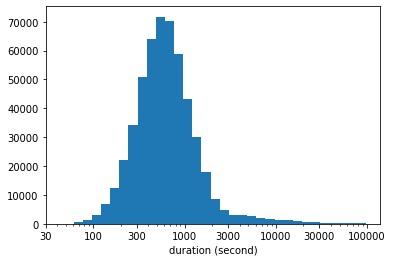

In [6]:
bin_edges = 10 ** np.arange(1.785330, 4.936358 + 0.1, 0.1)
ticks = [30,100,300,1000,3000,10000,30000,100000]
labls = ['{}'.format(v) for v in ticks]
plt.hist(data = df_clean, x ='duration_sec', bins = bin_edges);
plt.xscale("log");
plt.xlabel('duration (second)')
plt.xticks(ticks,labls);

Most of the riders travel duration time is between 500 to 1000 seconds

In [7]:
#Usage by females, males, and other
gender = df_clean.member_gender.value_counts()

## What is the percentage of male users, female users and others.

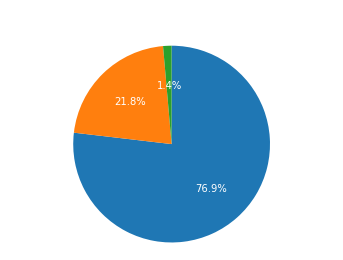

In [8]:
plt.pie(gender, labels = gender.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'});
plt.axis('square');
plt.title('Ford GoBike System User by Gender', y=1.05, fontsize=16, fontweight='bold', color = 'white');

Here blue area represents the male riders.
Orange area represents female riders.
and green area represents others riders.

we can see that there are approx 76% Male riders, 21% female riders and rest riders of other gender.

In [9]:
# Customers vs Subscribers
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df_clean['bike_id'].count()
subscriber_prop = subscriber / df_clean['bike_id'].count()

## What is the percentage of Customer and subscriber who booked rides?

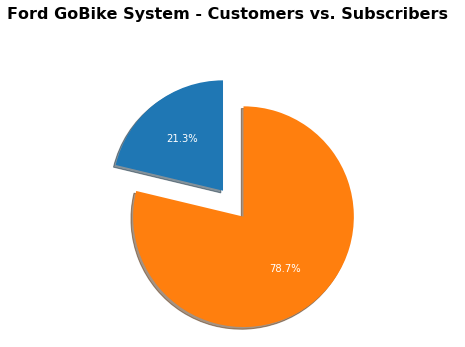

In [10]:
# Customers vs Subscribers Visuals
# pie chart
plt.figure(figsize = [8, 5])

labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white'})
plt.axis('equal')

plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

There are approx 79% subscriber and 21% customer using the service of fordgo-bikes service

## How many ride trips are taken by customers and subscribers.

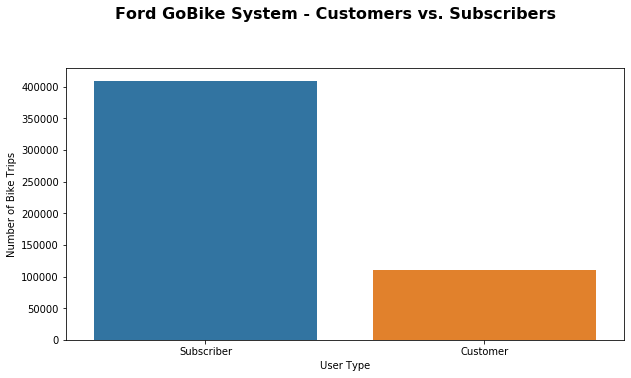

In [11]:

# Customers vs Subscribers Visuals
# bar chart
plt.figure(figsize = [10, 5])

graph = sb.countplot(data = df_clean ,x = "user_type", order = df_clean.user_type.value_counts().index);
graph.set_xlabel('User Type');
graph.set_ylabel('Number of Bike Trips');
plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

This plot shows count of subscriber and customer using the fordgo-bike service. as we can see from the plot that there are more than 400000 trips taken by the subscriber and more than 100000 rides was taken by customer

## Bivariate plot between member Gender and user Type.

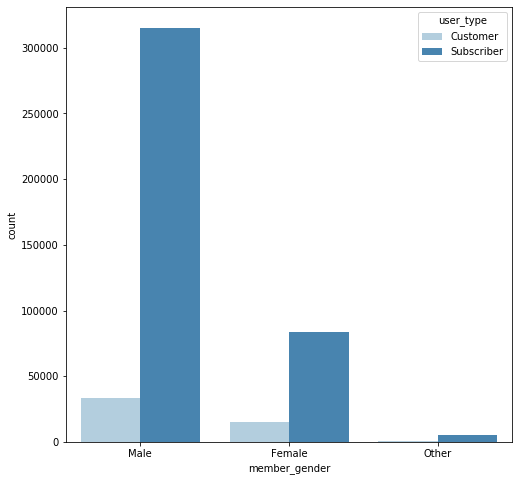

In [12]:
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(1, 1, 1)
sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type', palette = 'Blues')

plt.show()

Most of the subscribers are male members. There are more than 300000 male subscribers, also this plot reveals subscribers are booking more rides than normal customers.

## Draw point plot between members age vs user_type vs member_gender.

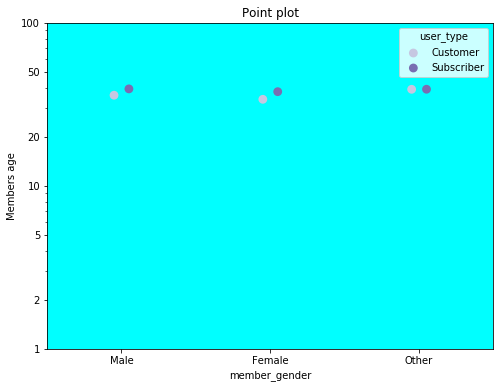

In [13]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_clean, x = 'member_gender', y = 'member_age', hue = 'user_type',
           palette = 'Purples', linestyles = '', dodge = 0.1);
plt.title('Point plot');
plt.ylabel('Members age')
ax.set_facecolor('xkcd:cyan')
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

A dodged point plot for user member gender of different ages. there are two user types customer and subscriber.

average age of most of the user types and genders is of 30 to 40 year

# Summary

Most of the riders are male subscribers. most members are of age around 25 to 40 years old. Though not a huge difference, male riders tend to have shorter trips compared to female users. Riders who rented the bikes from Monday to Friday are older than those who ride on weekends.